In [1]:
import neuromaps
print("neuromaps version:", neuromaps.__version__)

neuromaps version: 0.0.5+41.gf0ed67c


In [ ]:
## run if needed
# pip install neuromaps brainspace

In [1]:
# Add more imports if needed

from neuromaps.datasets import fetch_atlas ## used to access the templates for the coordinate system
import nibabel as nib ## used to load system dictionary per key
from neuromaps.datasets import available_annotations ## repository of brain maps - spatial maps representing some
from neuromaps.datasets import available_tags ## most annotations have “tags” that help to describe the data they represent
from neuromaps.datasets import fetch_annotation
from neuromaps import transforms
import netneurotools
# possibly need
from netneurotools import datasets as nntdata
from neuromaps import parcellate
from neuromaps.parcellate import Parcellater
from neuromaps.images import dlabel_to_gifti
# plotting 
from neuromaps.images import load_data
import matplotlib.pyplot as plt
from neuromaps import plotting
from nilearn import plotting
import numpy as np
# sampling
from neuromaps import datasets, images, nulls, resampling
from neuromaps.resampling import resample_images
from neuromaps.stats import compare_images
from scipy.spatial.distance import cosine
from neuromaps import stats
from nilearn.datasets import fetch_atlas_surf_destrieux
from neuromaps.nulls import alexander_bloch
from neuromaps.stats import compare_images
from scipy.stats import pearsonr

from nilearn.surface import load_surf_mesh
from brainspace.null_models import SpinPermutations

In [ ]:
# for annotation in available_annotations():
#     print(annotation)

### Our Source Map

In [19]:
## note this map is 164k density
evo_map = fetch_annotation(source='hill2010', desc='evoexp', space='fsLR', den='164k')
print(evo_map)


[References] Please cite the following papers if you are using this data:

  For {'source': 'hill2010', 'desc': 'evoexp', 'space': 'fsLR', 'den': '164k'}:
  [primary]:
    Jason Hill, Terrie Inder, Jeffrey Neil, Donna Dierker, John Harwell, and David Van Essen. Similar patterns of cortical expansion during human development and evolution. Proceedings of the National Academy of Sciences, 107(29):13135–13140, 2010.
  [secondary]:
    
/Users/kevin/neuromaps-data/annotations/hill2010/evoexp/fsLR/source-hill2010_desc-evoexp_space-fsLR_den-164k_hemi-R_feature.func.gii


In [14]:
ls ~/neuromaps-data/annotations/hill2010/evoexp/fsLR/

source-hill2010_desc-evoexp_space-fsLR_den-164k_hemi-R_feature.func.gii


### Target Maps
There are 12
1. P1 Gene Expression
2. T1w/T2w ratio (Myelin)
3. Cortical Thickness
4. Developmental expansion
5. Functional gradient
6. Intersubject variability
7. Cerebral blood flow
8. Cerebral blood volume
9. Oxygen metabolism
10. Glucose metabolism
11. Allometric scaling NIH
12. Allometric scaling PNC

In [10]:
# Kevin S will be working with these
('abagen', 'genepc1', 'fsaverage', '10k') # PC1 gene expression
('hcps1200', 'myelinmap', 'fsLR', '32k') # myelin maps - T1w/T2w ratio
('hcps1200', 'thickness', 'fsLR', '32k') # cortical thickness
('hill2010', 'devexp', 'fsLR', '164k') # dev expansion
('margulies2016', 'fcgradient01', 'fsLR', '32k') # functional development
('mueller2013', 'intersubjvar', 'fsLR', '164k') # intersubject functional variability

('mueller2013', 'intersubjvar', 'fsLR', '164k')

In [44]:
# target_maps = {
#     'pc1 gene exp': {'source': 'abagen', 'desc': 'genepc1', 'space': 'fsaverage', 'den': '10k'},
#     'T1w/T2w ratio': {'source': 'hcps1200', 'desc': 'myelinmap', 'space': 'fsLR', 'den': '32k'},
#     'cortical thickness': {'source': 'hcps1200', 'desc': 'thickness', 'space': 'fsLR', 'den': '32k'},
#     'devexp': {'source': 'hill2010', 'desc': 'devexp', 'space': 'fsLR', 'den': '164k'},
#     'func gradient': {'source': 'margulies2016', 'desc': 'fcgradient01', 'space': 'fsLR', 'den': '32k'},
#     'intersubjvar': {'source': 'mueller2013', 'desc': 'intersubjvar', 'space': 'fsLR', 'den': '164k'}
# }

In [7]:
# Kevin H will be working with these
('raichle', 'cbf', 'fsLR', '164k') # cerebral blood flow
('raichle', 'cbv', 'fsLR', '164k') # cerebral blood volume
('raichle', 'cmr02', 'fsLR', '164k') # oxygen metabolism CMRO2
('raichle', 'cmrglc', 'fsLR', '164k') # glucose metabolism GMRGlu
('reardon2018', 'scalingpnc', 'civet', '41k') #  allometric scaling PNC
('reardon2018', 'scalingnih', 'civet', '41k') # allometric scaling NIH

('reardon2018', 'scalingnih', 'civet', '41k')

In [4]:
genepc1 = fetch_annotation(source='abagen', desc='genepc1', space='fsaverage', den='10k')
genepc1


[References] Please cite the following papers if you are using this data:

  For {'source': 'abagen', 'desc': 'genepc1', 'space': 'fsaverage', 'den': '10k'}:
  [primary]:
    Michael J Hawrylycz, Ed S Lein, Angela L Guillozet-Bongaarts, Elaine H Shen, Lydia Ng, Jeremy A Miller, Louie N Van De Lagemaat, Kimberly A Smith, Amanda Ebbert, Zackery L Riley, and others. An anatomically comprehensive atlas of the adult human brain transcriptome. Nature, 489(7416):391, 2012.
    Ross D Markello, Aurina Arnatkeviciute, Jean-Baptiste Poline, Ben D Fulcher, Alex Fornito, and Bratislav Misic. Standardizing workflows in imaging transcriptomics with the abagen toolbox. eLife, 10:e72129, 2021.
  [secondary]:
    


['/Users/kevin/neuromaps-data/annotations/abagen/genepc1/fsaverage/source-abagen_desc-genepc1_space-fsaverage_den-10k_hemi-L_feature.func.gii',
 '/Users/kevin/neuromaps-data/annotations/abagen/genepc1/fsaverage/source-abagen_desc-genepc1_space-fsaverage_den-10k_hemi-R_feature.func.gii']

In [5]:
T1w_T2w_ratio = fetch_annotation(source='hcps1200', desc='myelinmap',space='fsLR', den='32k')
T1w_T2w_ratio

[fetch_single_file] Downloading data from https://files.osf.io/v1/resources/4mw3a/providers/osfstorage/6130fe1c4e5ee50219291a2a ...
[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from https://files.osf.io/v1/resources/4mw3a/providers/osfstorage/6130fe29af610c0216dfdd20 ...
[fetch_single_file]  ...done. (2 seconds, 0 min)


[References] Please cite the following papers if you are using this data:

  For {'source': 'hcps1200', 'desc': 'myelinmap', 'space': 'fsLR', 'den': '32k'}:
  [primary]:
    Matthew F Glasser, Timothy S Coalson, Emma C Robinson, Carl D Hacker, John Harwell, Essa Yacoub, Kamil Ugurbil, Jesper Andersson, Christian F Beckmann, Mark Jenkinson, and others. A multi-modal parcellation of human cerebral cortex. Nature, 536(7615):171–178, 2016.
  [secondary]:
    


['/Users/kevin/neuromaps-data/annotations/hcps1200/myelinmap/fsLR/source-hcps1200_desc-myelinmap_space-fsLR_den-32k_hemi-L_feature.func.gii',
 '/Users/kevin/neuromaps-data/annotations/hcps1200/myelinmap/fsLR/source-hcps1200_desc-myelinmap_space-fsLR_den-32k_hemi-R_feature.func.gii']

In [9]:
cortical_thickness = fetch_annotation(source= 'hcps1200', desc= 'thickness', space='fsLR', den='32k')
cortical_thickness

[fetch_single_file] Downloading data from https://files.osf.io/v1/resources/4mw3a/providers/osfstorage/6130fe34af610c0217dfe61a ...
[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from https://files.osf.io/v1/resources/4mw3a/providers/osfstorage/6130fe40ab8bca0225edc458 ...
[fetch_single_file]  ...done. (1 seconds, 0 min)


[References] Please cite the following papers if you are using this data:

  For {'source': 'hcps1200', 'desc': 'thickness', 'space': 'fsLR', 'den': '32k'}:
  [primary]:
    Matthew F Glasser, Timothy S Coalson, Emma C Robinson, Carl D Hacker, John Harwell, Essa Yacoub, Kamil Ugurbil, Jesper Andersson, Christian F Beckmann, Mark Jenkinson, and others. A multi-modal parcellation of human cerebral cortex. Nature, 536(7615):171–178, 2016.
  [secondary]:
    


['/Users/kevin/neuromaps-data/annotations/hcps1200/thickness/fsLR/source-hcps1200_desc-thickness_space-fsLR_den-32k_hemi-L_feature.func.gii',
 '/Users/kevin/neuromaps-data/annotations/hcps1200/thickness/fsLR/source-hcps1200_desc-thickness_space-fsLR_den-32k_hemi-R_feature.func.gii']

In [10]:
dev_expansion = fetch_annotation(source='hill2010', desc='devexp', space='fsLR', den='164k')
dev_expansion

[fetch_single_file] Downloading data from https://files.osf.io/v1/resources/4mw3a/providers/osfstorage/6130ff0d4e5ee50219291d77 ...
[fetch_single_file]  ...done. (2 seconds, 0 min)


[References] Please cite the following papers if you are using this data:

  For {'source': 'hill2010', 'desc': 'devexp', 'space': 'fsLR', 'den': '164k'}:
  [primary]:
    Jason Hill, Terrie Inder, Jeffrey Neil, Donna Dierker, John Harwell, and David Van Essen. Similar patterns of cortical expansion during human development and evolution. Proceedings of the National Academy of Sciences, 107(29):13135–13140, 2010.
  [secondary]:
    


'/Users/kevin/neuromaps-data/annotations/hill2010/devexp/fsLR/source-hill2010_desc-devexp_space-fsLR_den-164k_hemi-R_feature.func.gii'

In [11]:
func_dev = fetch_annotation(source='margulies2016', desc='fcgradient01', space='fsLR', den='32k')
func_dev


[References] Please cite the following papers if you are using this data:

  For {'source': 'margulies2016', 'desc': 'fcgradient01', 'space': 'fsLR', 'den': '32k'}:
  [primary]:
    Daniel S Margulies, Satrajit S Ghosh, Alexandros Goulas, Marcel Falkiewicz, Julia M Huntenburg, Georg Langs, Gleb Bezgin, Simon B Eickhoff, F Xavier Castellanos, Michael Petrides, and others. Situating the default-mode network along a principal gradient of macroscale cortical organization. Proc Natl Acad Sci USA, 113(44):12574–12579, 2016.
  [secondary]:
    


['/Users/kevin/neuromaps-data/annotations/margulies2016/fcgradient01/fsLR/source-margulies2016_desc-fcgradient01_space-fsLR_den-32k_hemi-L_feature.func.gii',
 '/Users/kevin/neuromaps-data/annotations/margulies2016/fcgradient01/fsLR/source-margulies2016_desc-fcgradient01_space-fsLR_den-32k_hemi-R_feature.func.gii']

In [12]:
intersub_func_var = fetch_annotation(source='mueller2013', desc='intersubjvar', space='fsLR', den='164k')
intersub_func_var

[fetch_single_file] Downloading data from https://files.osf.io/v1/resources/4mw3a/providers/osfstorage/6130ff274e5ee50219291de1 ...
[fetch_single_file]  ...done. (2 seconds, 0 min)

[fetch_single_file] Downloading data from https://files.osf.io/v1/resources/4mw3a/providers/osfstorage/6130ff33ab8bca0225edc685 ...
[fetch_single_file]  ...done. (1 seconds, 0 min)


[References] Please cite the following papers if you are using this data:

  For {'source': 'mueller2013', 'desc': 'intersubjvar', 'space': 'fsLR', 'den': '164k'}:
  [primary]:
    Sophia Mueller, Danhong Wang, Michael D Fox, BT Thomas Yeo, Jorge Sepulcre, Mert R Sabuncu, Rebecca Shafee, Jie Lu, and Hesheng Liu. Individual variability in functional connectivity architecture of the human brain. Neuron, 77(3):586–595, 2013.
  [secondary]:
    


['/Users/kevin/neuromaps-data/annotations/mueller2013/intersubjvar/fsLR/source-mueller2013_desc-intersubjvar_space-fsLR_den-164k_hemi-L_feature.func.gii',
 '/Users/kevin/neuromaps-data/annotations/mueller2013/intersubjvar/fsLR/source-mueller2013_desc-intersubjvar_space-fsLR_den-164k_hemi-R_feature.func.gii']


[References] Please cite the following papers if you are using this data:

  For {'source': 'hill2010', 'desc': 'evoexp', 'space': 'fsLR', 'den': '164k'}:
  [primary]:
    Jason Hill, Terrie Inder, Jeffrey Neil, Donna Dierker, John Harwell, and David Van Essen. Similar patterns of cortical expansion during human development and evolution. Proceedings of the National Academy of Sciences, 107(29):13135–13140, 2010.
  [secondary]:
    
Right hemisphere file: /Users/kevin/neuromaps-data/annotations/hill2010/evoexp/fsLR/source-hill2010_desc-evoexp_space-fsLR_den-164k_hemi-R_feature.func.gii
Right hemisphere data shape: (163842,)


/var/folders/ff/1nvxwnl16fs1my8jhytzdqxw0000gn/T/ipykernel_26962/3960743077.py:30: DeprecationWarning: The `darkness` parameter will be deprecated in release 0.13. We recommend setting `darkness` to None
  plotting.plot_surf(


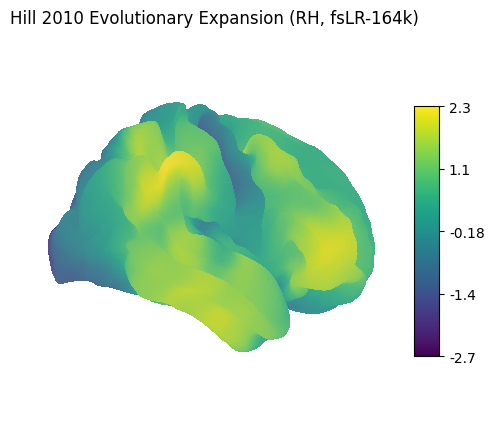

In [22]:
evo_map = fetch_annotation(
    source='hill2010',
    desc='evoexp',
    space='fsLR',
    den='164k'
)
if isinstance(evo_map, str):
    rh_path = evo_map
elif isinstance(evo_map, (list, tuple)):
    rh_path = evo_map[0]
else:
    raise ValueError("Unexpected evo_map format: ", evo_map)
print("Right hemisphere file:", rh_path)

rh_data = load_data(rh_path)
print("Right hemisphere data shape:", rh_data.shape)

fslr = fetch_atlas('fsLR', density='164k')
surf_r = fslr['midthickness'].R

plotting.plot_surf(
    surf_mesh=surf_r,
    surf_map=rh_data,
    hemi='right',
    view='lateral',
    cmap='viridis',
    colorbar=True,
    bg_on_data=True,
    title='Hill 2010 Evolutionary Expansion (RH, fsLR-164k)'
)

plt.show()


### Transform Source map into same Surface Spaces as target Maps

In [32]:
evo_map
evo_in_fsaverage10k = transforms.fslr_to_fsaverage(evo_map, '10k', hemi='R')

In [42]:
from neuromaps.images import load_data
import numpy as np
from scipy.stats import pearsonr

evo_data = load_data(evo_in_fsaverage10k[0])
genepc1_data = load_data('/Users/kevin/neuromaps-data/annotations/abagen/genepc1/fsaverage/source-abagen_desc-genepc1_space-fsaverage_den-10k_hemi-R_feature.func.gii')

mask = ~np.isnan(evo_data) & ~np.isnan(genepc1_data)

r_emp,_ = pearsonr(evo_data[mask], genepc1_data[mask])
print(f'Empirical correlation (Source Map vs GenePC1) = {r_emp:.3f}')

Empirical correlation (Hill2010 vs GenePC1) = -0.510


In [40]:
evo_data_r = load_data(evo_in_fsaverage10k[0])
genepc1_r = load_data(genepc1[1]) # right hemi

# make left hemi NaN's so spin test works
evo_full = np.concatenate([np.full_like(evo_data_r, np.nan), evo_data_r])
genepc1_full = np.concatenate([np.full_like(genepc1_r, np.nan), genepc1_r])
print(f"Full evo map shape: {evo_full.shape}")
print(f"Full gene map shape: {genepc1_full.shape}")

# empirical correlation
mask = ~np.isnan(evo_full) & ~np.isnan(genepc1_full)
r_emp, _ = pearsonr(evo_full[mask], genepc1_full[mask])
print(f"Empirical correlation = {r_emp:.3f}")

# spin test
nulls = alexander_bloch(
    evo_full,
    atlas='fsaverage',
    density='10k',
    n_perm=1000
)

# empirical r to null
r_emp, p_spin = compare_images(
    evo_full,
    genepc1_full,
    nulls=nulls,
    metric='pearsonr'
)
print(f"Spatial correlation for Gene Expression = {r_emp:.3f}, spin-test p = {p_spin:.4f}")

Full evo map shape: (20484,)
Full gene map shape: (20484,)
Empirical correlation = -0.510
Spatial correlation = -0.512, spin-test p = 0.0370


In [70]:
T1w_T2w_ratio

['/Users/kevin/neuromaps-data/annotations/hcps1200/myelinmap/fsLR/source-hcps1200_desc-myelinmap_space-fsLR_den-32k_hemi-L_feature.func.gii',
 '/Users/kevin/neuromaps-data/annotations/hcps1200/myelinmap/fsLR/source-hcps1200_desc-myelinmap_space-fsLR_den-32k_hemi-R_feature.func.gii']

In [68]:
evo_map
evo_in_fsLR32k = transforms.fslr_to_fslr(evo_map, '32k', hemi='R')

In [69]:
evo_data_32k = load_data(evo_in_fsLR32k)
tw_ratio_data = load_data(T1w_T2w_ratio[1])

mask = ~np.isnan(evo_data_32k) & ~np.isnan(tw_ratio_data)

r_emp,_ = pearsonr(evo_data_32k[mask], tw_ratio_data[mask])
print(f'Empirical correlation (Source Map vs T1w\T2w Ratio) = {r_emp:.3f}')

Empirical correlation (Source Map vs T1w\T2w Ratio) = -0.040


In [79]:
from neuromaps.images import load_data
from nilearn.surface import load_surf_mesh
from brainspace.null_models import SpinPermutations
from scipy.stats import pearsonr
import numpy as np

In [84]:
evo_r = load_data(evo_in_fsLR32k)
tgt_r = load_data(T1w_T2w_ratio[1])

# ---- Load sphere coordinates for the SAME mesh ----
# For fsLR 32k:

# --- FIX: Fetch the fsLR 32k atlas to get its geometry files ---
fslr_32k = fetch_atlas('fsLR', density='32k')

# --- FIX: Get the path to the RIGHT HEMISPHERE SPHERE file ---
sphere_r_path = fslr_32k['sphere'].R 

# This will now work!
coords, faces = load_surf_mesh(sphere_r_path)

# ---- Check shapes ----
assert evo_r.shape[0] == tgt_r.shape[0] == coords.shape[0]

# ---- Empirical correlation ----
mask = ~np.isnan(evo_r) & ~np.isnan(tgt_r)
r_emp, _ = pearsonr(evo_r[mask], tgt_r[mask])
print(f"Empirical correlation = {r_emp:.3f}")

# ---- Spin permutations ----
n_perm = 1000
sp = SpinPermutations(n_rep=n_perm)
sp.fit(coords[mask])
permuted = sp.randomize(evo_r[mask])

# ---- Null distribution ----
# Now you can correlate the permuted masked data with the target masked data
null_rs = np.array([
    pearsonr(permuted[i], tgt_r[mask])[0]
    for i in range(n_perm)
])

p_two = (np.sum(np.abs(null_rs) >= np.abs(r_emp)) + 1) / (n_perm + 1)
print(f"Spin-test (hemisphere) r = {r_emp:.3f}, p = {p_two:.4f}")

Empirical correlation = -0.040
Spin-test (hemisphere) r = -0.040, p(two-sided) = 0.8561
done


In [90]:
evo_data_32k = load_data(evo_in_fsLR32k)
cortical_thickness_data = load_data(cortical_thickness[1])

mask = ~np.isnan(evo_data_32k) & ~np.isnan(cortical_thickness_data)

r_emp,_ = pearsonr(evo_data_32k[mask], cortical_thickness_data[mask])
print(f'Empirical correlation (Source Map vs Cortical Thickness) = {r_emp:.3f}')

Empirical correlation (Source Map vs Cortical Thickness) = 0.247


In [91]:
evo_r = evo_data_32k
tgt_r = cortical_thickness_data

# ---- Load sphere coordinates for the SAME mesh ----
# For fsLR 32k:

# --- FIX: Fetch the fsLR 32k atlas to get its geometry files ---
fslr_32k = fetch_atlas('fsLR', density='32k')

# --- FIX: Get the path to the RIGHT HEMISPHERE SPHERE file ---
sphere_r_path = fslr_32k['sphere'].R 

# This will now work!
coords, faces = load_surf_mesh(sphere_r_path)

# ---- Check shapes ----
assert evo_r.shape[0] == tgt_r.shape[0] == coords.shape[0]

# ---- Empirical correlation ----
mask = ~np.isnan(evo_r) & ~np.isnan(tgt_r)
r_emp, _ = pearsonr(evo_r[mask], tgt_r[mask])
print(f"Empirical correlation = {r_emp:.3f}")

# ---- Spin permutations ----
n_perm = 1000
sp = SpinPermutations(n_rep=n_perm)
sp.fit(coords[mask])
permuted = sp.randomize(evo_r[mask])

# ---- Null distribution ----
# Now you can correlate the permuted masked data with the target masked data
null_rs = np.array([
    pearsonr(permuted[i], tgt_r[mask])[0]
    for i in range(n_perm)
])

p_two = (np.sum(np.abs(null_rs) >= np.abs(r_emp)) + 1) / (n_perm + 1)
print(f"Spin-test (hemisphere) r = {r_emp:.3f}, p = {p_two:.4f}")

Empirical correlation = 0.247
Spin-test (hemisphere) r = 0.247, p = 0.2008
